<a href="https://colab.research.google.com/github/Himakiran77/LGM-VIP-October-2021-Data-Science-Intern/blob/main/Iris_Flowers_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LGM** **VIP** **TASK** **1**: **Iris** **Flowers** **Classification** **ML** **Project**

**Beginner** **Level**

**Name**: **Mudambi** **Himakiran**

**IMPORT**

In [75]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import datasets,model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()

In [77]:
plt.rcParams['figure.figsize']=(15,9)

**DATA** **SET**

In [24]:
plt.rcParams['figure.figsize']=(15,9)

In [25]:
data=datasets.load_iris()

In [26]:
X=data['data']
y=data['target']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, train_size=0.8,random_state=15)

**PLOTTING** **OF** **TRAINING** **DATA**

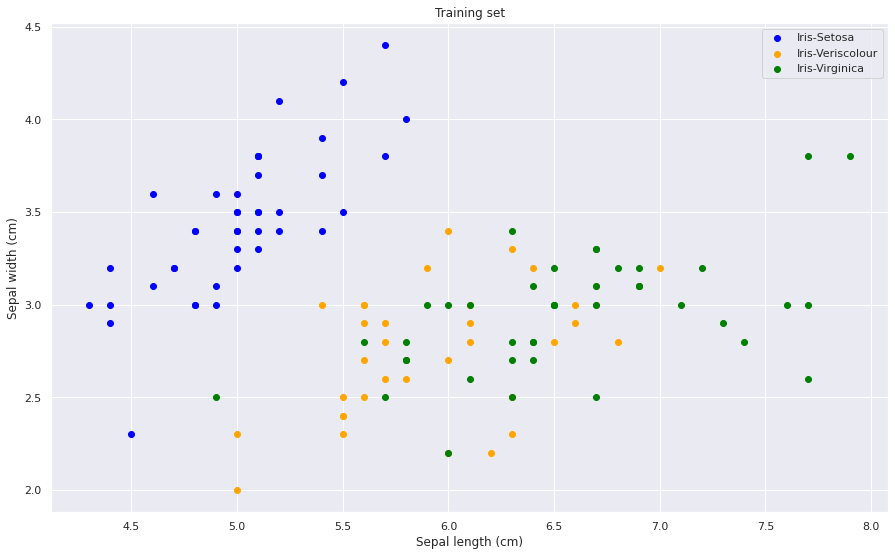

In [28]:
labels={0: "Iris-Setosa",1:'Iris-Veriscolour',2: 'Iris-Virginica'}
label_colours = ['blue','orange','green']

def plot_data(x,y,labels,colours,a=0,b=1,title='Training set'):
  for c in np.unique(y):
    inx = np.where(y == c)
    plt.scatter(x[inx, a], x[inx, b], label=labels[c],c=colours[c])
  plt.title(title)
  plt.xlabel("Sepal length (cm)")
  plt.ylabel("Sepal width (cm)")
  plt.legend()

plt.figure(figsize=(15,9))
plot_data(X_train, y_train, labels, label_colours)
plt.show()

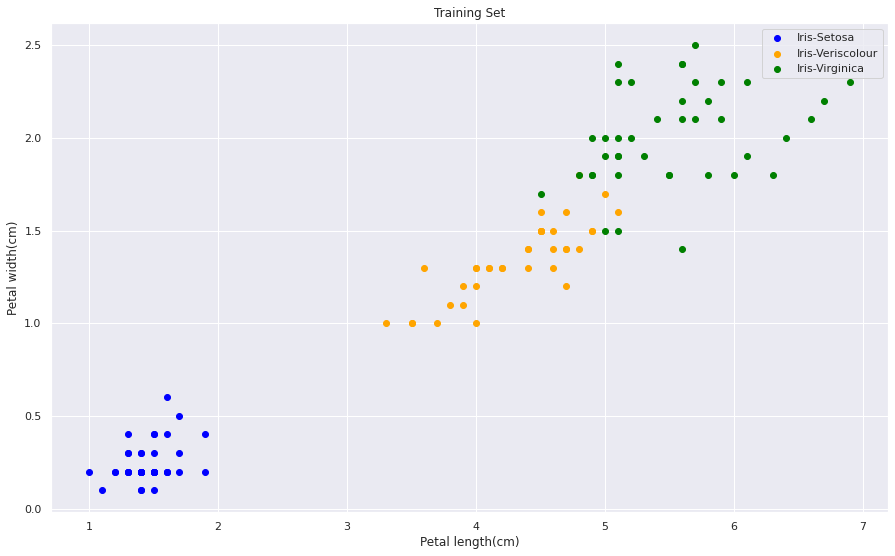

In [29]:
#plot the training data

labels = {0: 'Iris-Setosa',1:'Iris-Veriscolour',2:'Iris-Virginica'}
label_colours =['blue','orange','green']

plt.figure(figsize=(15,9))
#plot the data(X_train,y_train,labels,label_colours,a=2,b=3)
for c in np.unique(y_train):
  inx = np.where(y_train == c)
  plt.scatter(X_train[inx, 2],X_train[inx, 3],label=labels[c],c=label_colours[c])
plt.title("Training Set")
plt.xlabel("Petal length(cm)")
plt.ylabel("Petal width(cm)")
plt.legend()
plt.show()

**TRAINING** **OF** **FULL** **DATASET**

In [30]:

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
tf.keras.backend.clear_session()
mlp = Sequential([ 
                  Dense(3,input_shape=(4,),activation='softmax')])
mlp.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =mlp.fit(X_train, y_train, validation_split=0.1,batch_size=16, epochs=1000, verbose=0)

In [33]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.588744,0.231481,1.798896,0.25
1,1.565855,0.250000,1.768884,0.25
2,1.541572,0.259259,1.740304,0.25
3,1.518900,0.268519,1.711828,0.25
4,1.497438,0.287037,1.682682,0.25


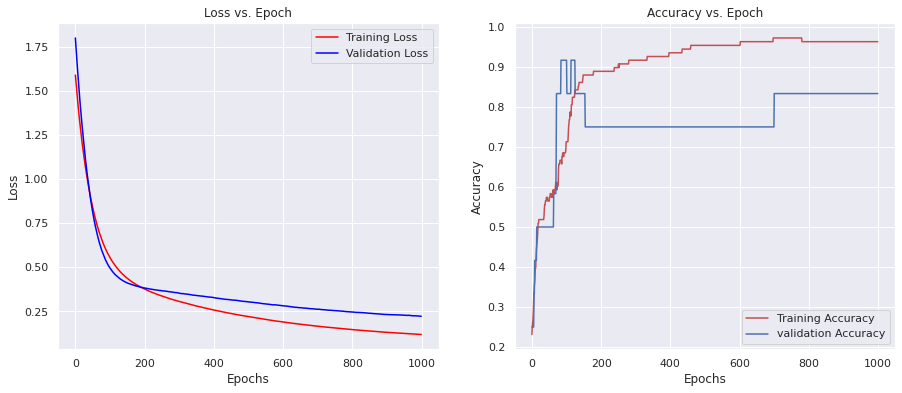

In [34]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(df['loss'],c='red',label='Training Loss')
plt.plot(df['val_loss'],c='blue',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['accuracy'],c='r',label='Training Accuracy')
plt.plot(df['val_accuracy'],c='b',label='validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.show()

In [35]:

mlp.evaluate(X_train,y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.1300 - accuracy: 0.9500


[0.1299527883529663, 0.949999988079071]

In [36]:
print(f'Test Accuracy : {mlp.evaluate(X_test,y_test)[1]: .2%}')

1/1 [==============================] - 0s 17ms/step - loss: 0.1014 - accuracy: 1.0000
Test Accuracy :  100.00%


**DATASET** (**SEPAL**)

In [37]:
X_train, X_test,y_train,y_test=model_selection.train_test_split(X[:, :2],y,train_size=0.8,random_state=15)

#Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:

X_train.shape

(120, 2)

**ARTIFICIAL** **NUERAL** **NETWORK**(**ANN**)

In [39]:
tf.keras.backend.clear_session()
classifier = Sequential([
                         Dense(5,input_shape=(2,),activation='relu'),
                         Dense(3,activation='softmax')
])
classifier.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = classifier.fit(X_train,y_train,validation_split=0.1,batch_size=16,epochs=1000,verbose=0)

In [41]:
df=pd.DataFrame(history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
995,0.362710,0.796296,0.305725,0.833333
996,0.362614,0.796296,0.306289,0.833333
997,0.362789,0.787037,0.308154,0.833333
998,0.362617,0.796296,0.307711,0.833333
999,0.362723,0.796296,0.307031,0.833333


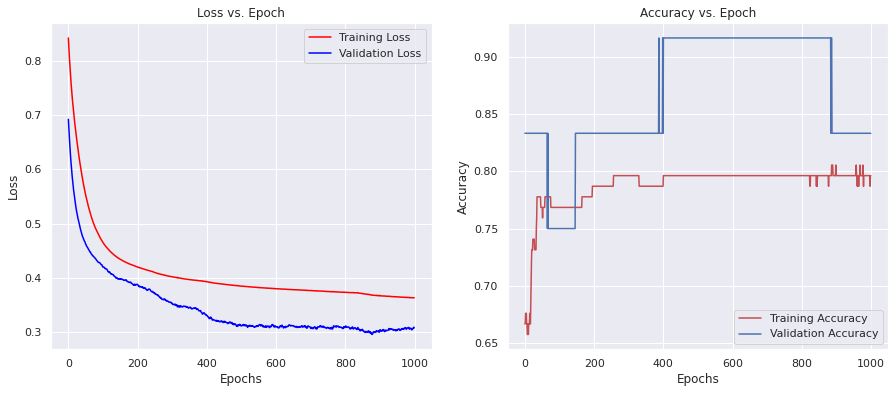

In [42]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(df['loss'],c='red',label='Training Loss')
plt.plot(df['val_loss'],c='blue',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['accuracy'],c='r',label='Training Accuracy')
plt.plot(df['val_accuracy'],c='b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.show()

In [43]:
classifier.evaluate(X_train,y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.3569 - accuracy: 0.8000


[0.3568730056285858, 0.800000011920929]

In [44]:

print(f'Test Accuracy: {classifier.evaluate(X_test,y_test)[1]: .2%}')

1/1 [==============================] - 0s 17ms/step - loss: 0.4006 - accuracy: 0.8333
Test Accuracy:  83.33%


**EVALUATE** **USING** **CONFUSION** **MATRIX**

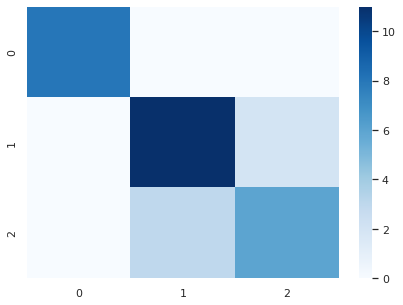

In [45]:
y_pred = np.argmax(classifier.predict(X_test),axis=1)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap="Blues")

**LOGISTIC** **REGRESSION**

In [51]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#result test

y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       2, 1, 0, 0, 2, 2, 2, 1])

**EVALUATION** **USING** **CONFUSION** **MATRIX**

Test Accuracy: 90.00%


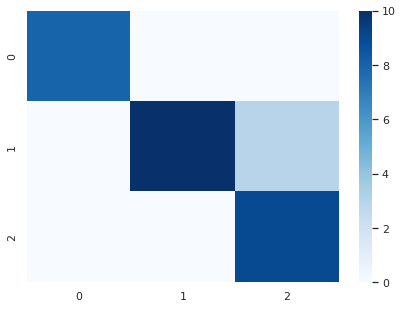

In [53]:
#evaluate using confusion matrix

cm=confusion_matrix(y_test,y_pred)
diagonal=np.sum(np.diagonal(cm))
Accuracy=diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy:.2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

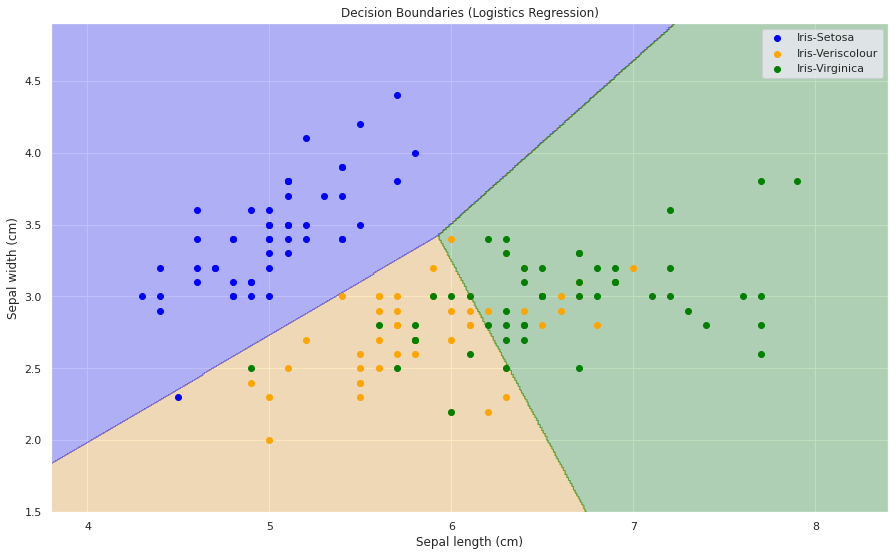

In [54]:
#visualise

num_points = 500
x_mesh,y_mesh = get_meshgrid([X[ :, 0].min()- 0.5,X[:,0].max() + 0.5],
                             [X[:, 1].min()-0.5,X[:,1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries (Logistics Regression)')
plt.show()

**NAIVE** **BAYES**

In [55]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
y_pred = classifier.predict(X_test)

Test Accuracy :  90.00%


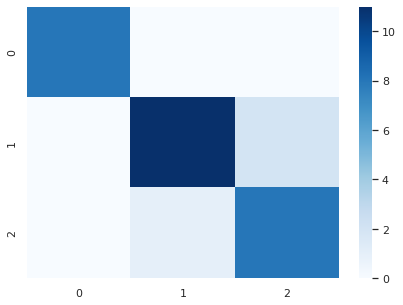

In [57]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy=diagonal / len(y_test)
print(f'Test Accuracy : {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

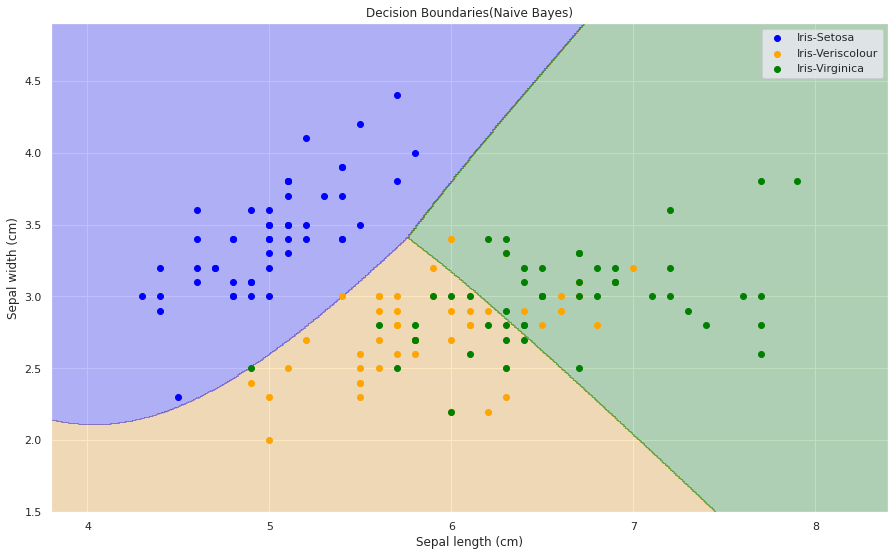

In [58]:

#visualise

num_points =500
x_mesh,y_mesh = get_meshgrid([X[:,0].min() -0.5,X[:,0].max() +0.5],
                             [X[:,1].min() -0.5,X[:,1].max() +0.5],num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries(Naive Bayes)')
plt.show()

**SUPPORT** **VECTOR** **MACHINE**(**SVM**)

In [60]:
#linear ,'poly','rbf','sigmoid','percomputed

In [61]:
from sklearn.svm import SVC
classifier =SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [62]:

y_pred = classifier.predict(X_test)

Test Accuracy :  86.67%


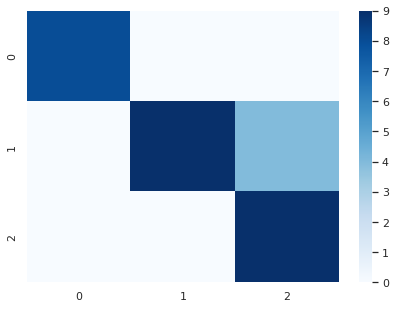

In [64]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy : {Accuracy : .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

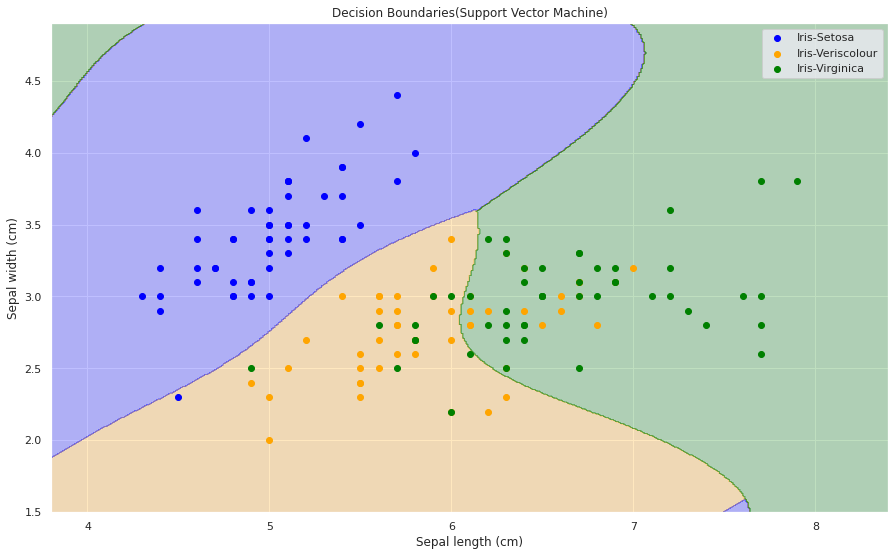

In [65]:
#visualise

num_points = 500
x_mesh,y_mesh = get_meshgrid([X[:,0].min() - 0.5,X[:,0].max() + 0.5],
                             [X[:,1].min() - 0.5, X[:,1].max() +0.5],num_points=num_points)
y_pred=classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))
plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries(Support Vector Machine)')
plt.show()


**K**-**NEAREST** **NEIGHBORS**

In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:

y_pred = classifier.predict(X_test)

Test Accuracy:  70.00%


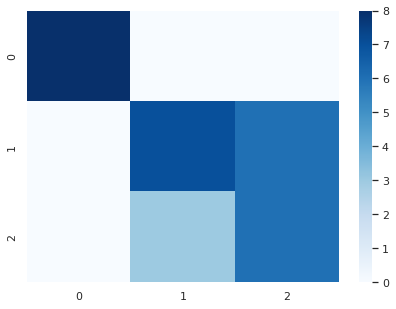

In [69]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

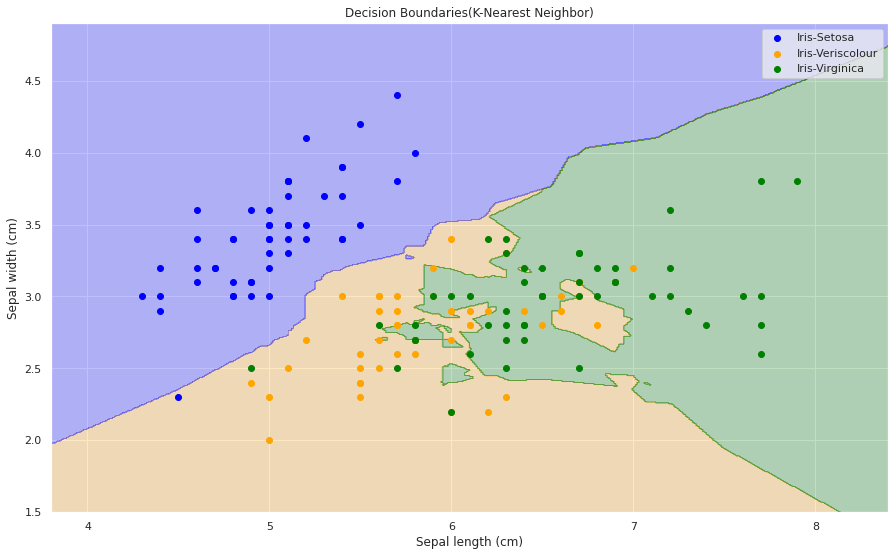

In [70]:
#visualise

num_points = 500
x_mesh,y_mesh = get_meshgrid([X[:,0].min() - 0.5,X[:,0].max() + 0.5],
                             [X[:,1].min() - 0.5, X[:,1].max() +0.5],num_points=num_points)
y_pred=classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))
plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries(K-Nearest Neighbor)')

**Random** **Forest**

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
y_pred = classifier.predict(X_test)

Test Accuracy:  76.67%


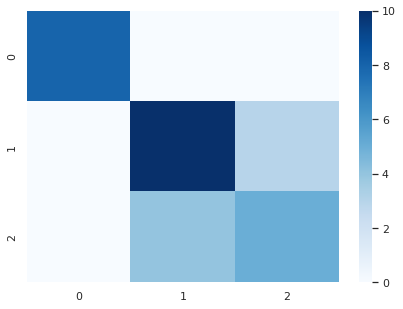

In [73]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

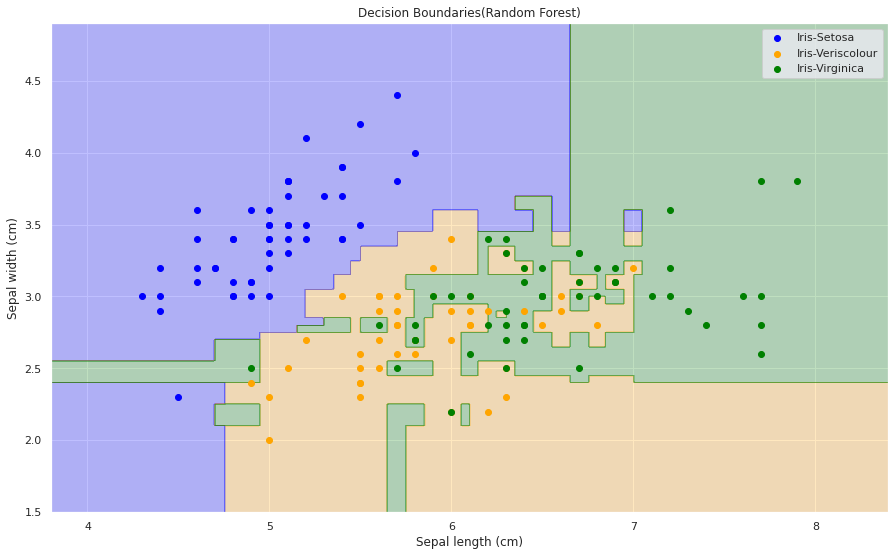

In [74]:
#visualise

num_points = 500
x_mesh,y_mesh = get_meshgrid([X[:,0].min() - 0.5,X[:,0].max() + 0.5],
                             [X[:,1].min() - 0.5, X[:,1].max() +0.5],num_points=num_points)
y_pred=classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))
plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries(Random Forest)')
plt.show()